# Teste - Ciência de Dados / Otimização e Pesquisa Operacional (Short Track)

### Cenário 1

No seguinte cenário você é a pessoa cientista de dados por trás de um projeto de analytics junto a uma grande indústria norte-americana.

Os dados a serem ingeridos e analisados em nossa plataforma de Big Data são dados de compras (orders), pessoas (people) e devoluções (returns).

Sua primeira tarefa, a partir desse cenário, deve ser um relatório (de preferência um <a href="https://jupyter.org/">jupyter notebook</a> ou <a href="https://colab.research.google.com/">colab notebook</a> relatando algumas das anomalias encontradas e investigações possíveis (falamos que aqui encorajamos gente curiosa, certo?!)

O dataset a ser utilizado nesse cenário (.zip com arquivo CSV) você encontra <a href="https://drive.google.com/file/d/1a8UCbzXFbqTQi0x8tqCXPRTlB--E7o8I/view?usp=sharing">aqui</a>.

Temos um apreço muito grande por qualidade e disponibilidade. Sendo assim, é bom contarmos com métricas para nos previnir e alertar sobre quaisquer problemas bem como metrificar e monitorar as arquitetura proposta. Logo, apreciamos se você conseguir entregar testes que mensurem a qualidade dos dados junto à sua solução desse primeiro entregável.

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import utils
pd.set_option('display.max_columns', None)

In [2]:
df_orders = pd.read_excel('data/sample.xls', sheet_name='Orders')
df_returns = pd.read_excel('data/sample.xls', sheet_name='Returns')
df_people = pd.read_excel('data/sample.xls', sheet_name='People')

In [3]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
df_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  296 non-null    object
 1   Order ID  296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [5]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Person  4 non-null      object
 1   Region  4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes


In [6]:
df_orders

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [7]:
df_returns

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


In [8]:
df_people

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


Fazendo o merge entre os dataframes

In [9]:
df = df_orders.merge(df_returns, on='Order ID', how='left').merge(df_people, on='Region', how='left')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,Person
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,NaN,Cassandra Brandow
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,NaN,Cassandra Brandow
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,NaN,Anna Andreadi
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,NaN,Cassandra Brandow
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,NaN,Cassandra Brandow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,NaN,Cassandra Brandow
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,Yes,Anna Andreadi
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,Yes,Anna Andreadi
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,Yes,Anna Andreadi


<Axes: >

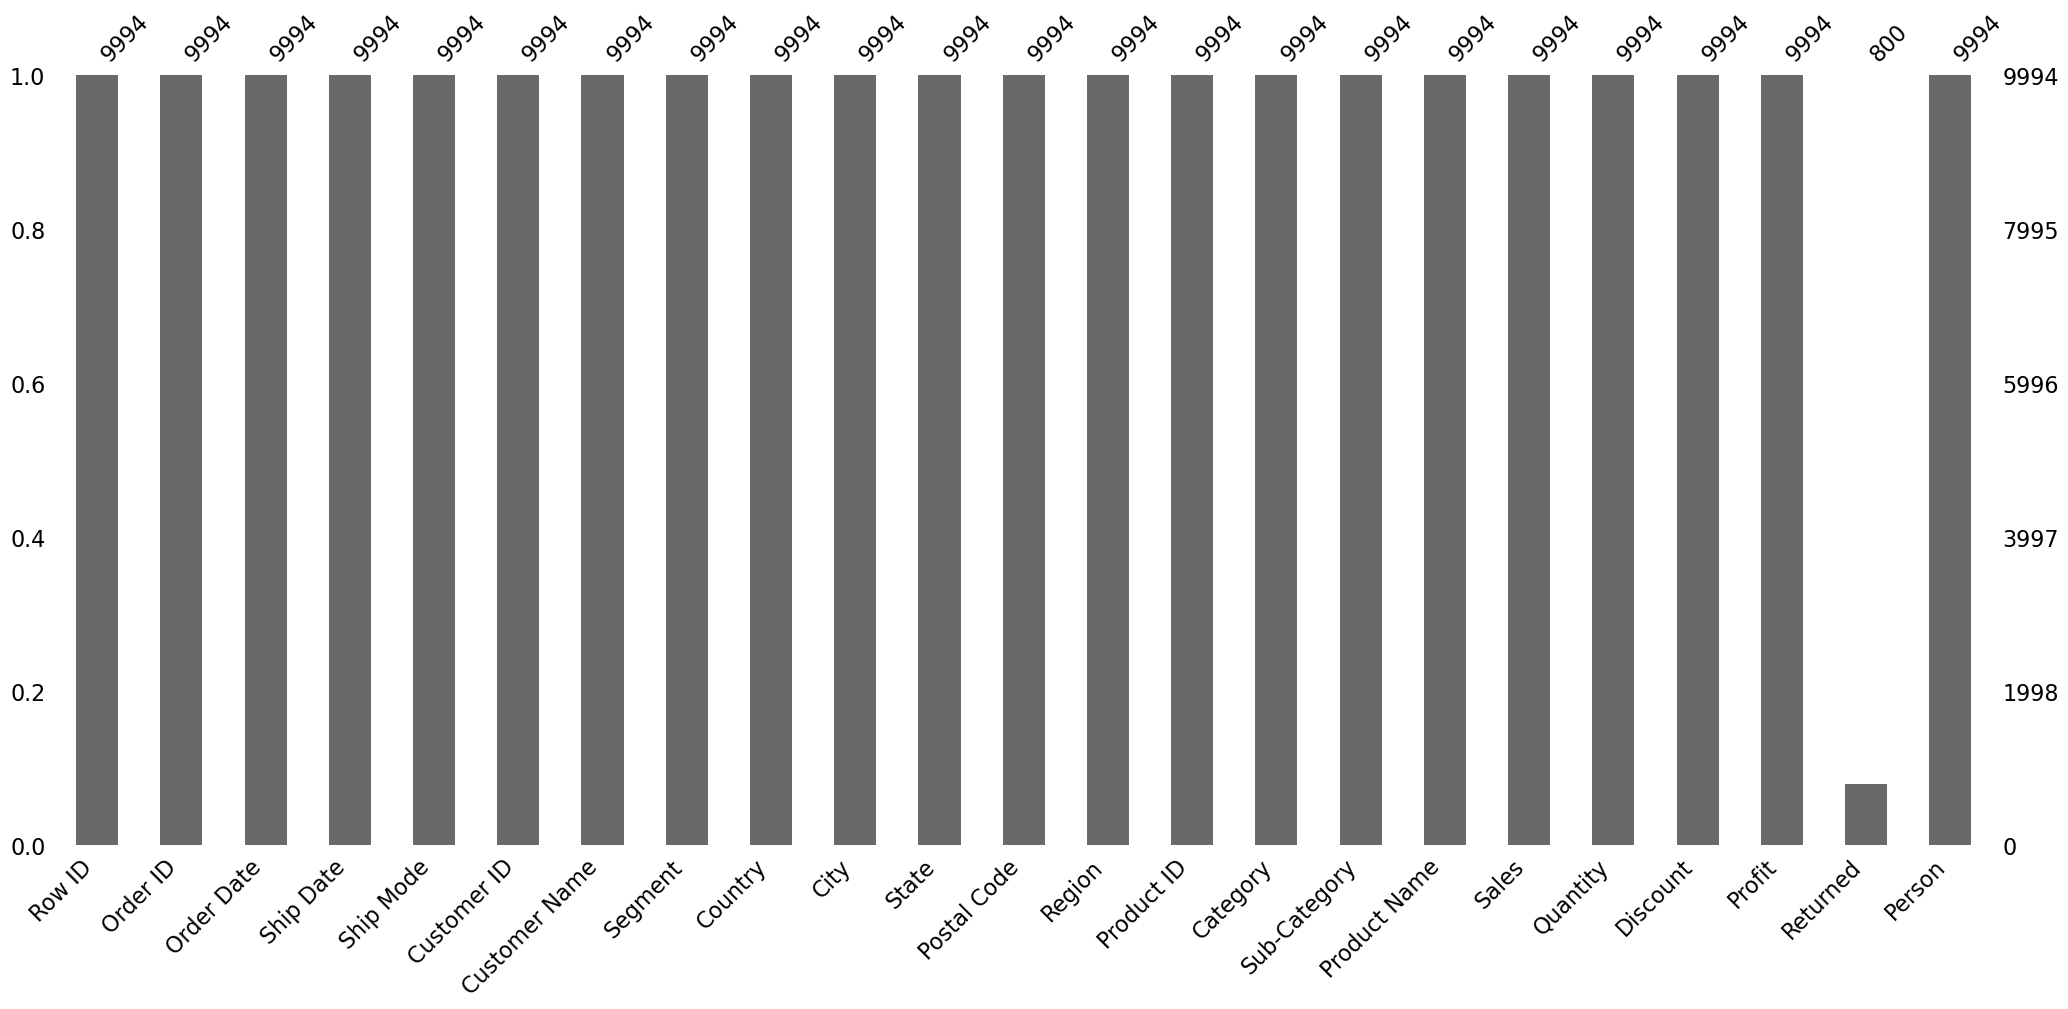

In [10]:
msno.bar(df)

O dataframe não contém dados faltantes. O que ocorre com a colune Returned é que os dados faltanes são os itens que não foram devolvidos. Vamos corrigir isto. 

In [11]:
df = df.fillna("No")

In [12]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,Person
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,No,Cassandra Brandow
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,No,Cassandra Brandow
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,No,Anna Andreadi
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,No,Cassandra Brandow
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,No,Cassandra Brandow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,No,Cassandra Brandow
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,Yes,Anna Andreadi
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,Yes,Anna Andreadi
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,Yes,Anna Andreadi


### Eficiência da Logística
- Qual é o tempo médio de entrega em diferentes modos de envio?


In [13]:
df['Delivery_time'] = (df['Ship Date'] - df['Order Date']).dt.days
avg_delivery_time = df.groupby('Ship Mode')['Delivery_time'].mean()

print(avg_delivery_time)

Ship Mode
First Class       2.182705
Same Day          0.044199
Second Class      3.238046
Standard Class    5.006535
Name: Delivery_time, dtype: float64


- Há padrões nos atrasos de entrega que precisam ser abordados?

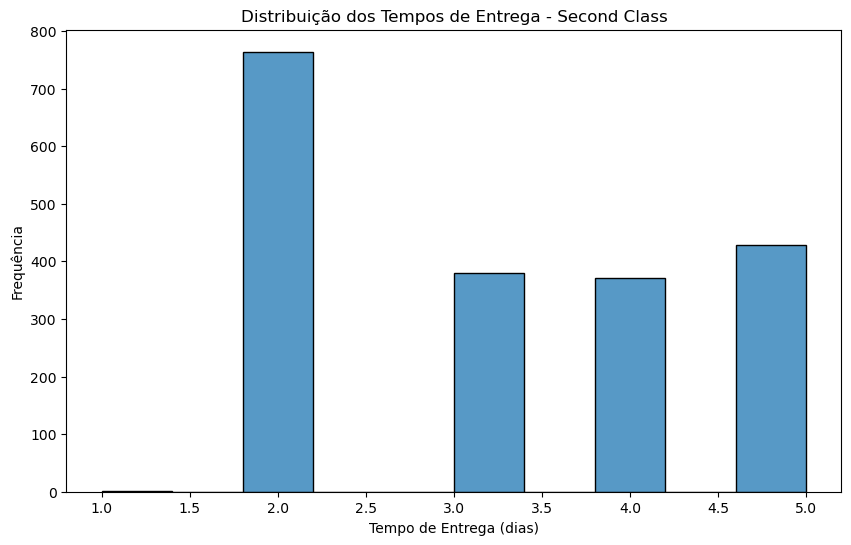

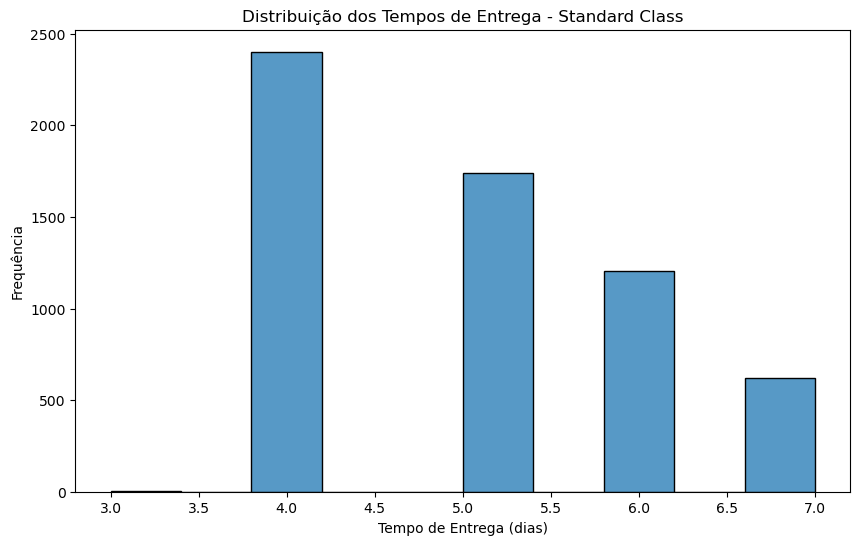

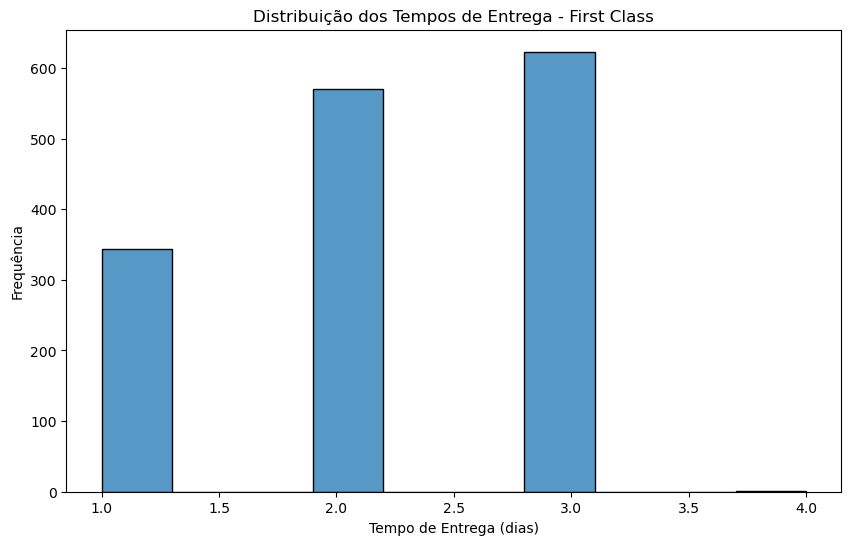

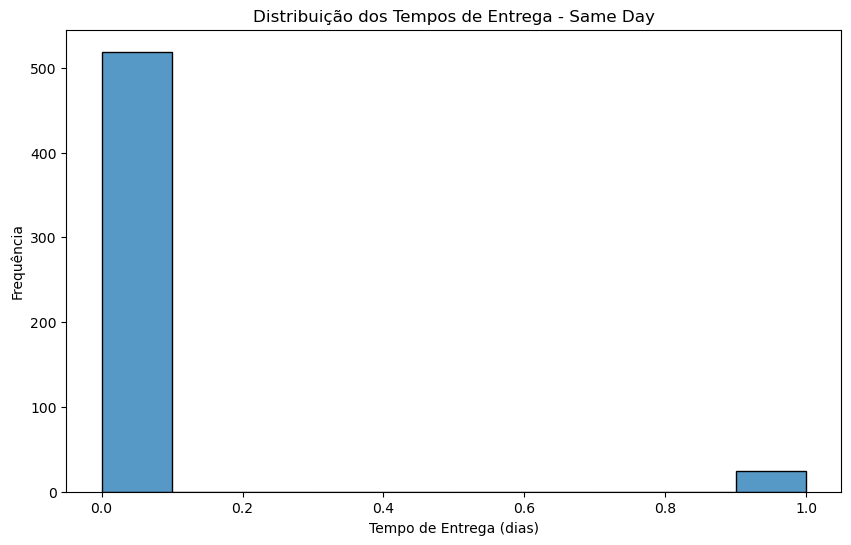

<Axes: xlabel='Delivery_time', ylabel='Ship Mode'>

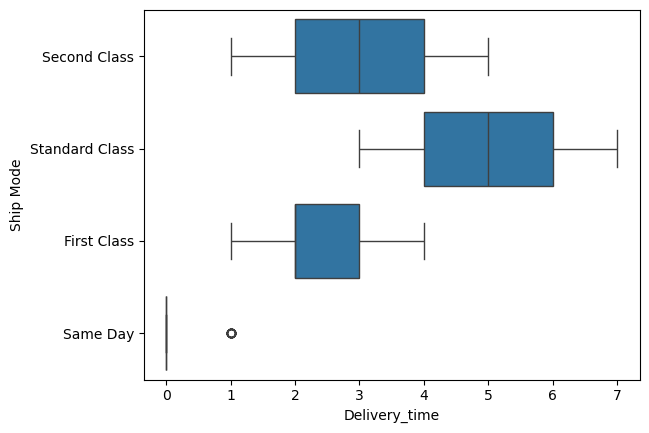

In [14]:
for i in df['Ship Mode'].unique():
    df_aux = df[df['Ship Mode'] == i]
    plt.figure(figsize=(10, 6))
    sns.histplot(df_aux['Delivery_time'], bins=10)
    plt.title(f'Distribuição dos Tempos de Entrega - {i}')
    plt.xlabel('Tempo de Entrega (dias)')
    plt.ylabel('Frequência')
    plt.show()

sns.boxplot(data=df, x="Delivery_time", y="Ship Mode")

As entregas do tipo "Same Day" deveriam ter um delivery time igual a 0. Poderíamos esperar também que entregas do tipo "First Class" tenham tempo de entrega menor ou igual a 4 dias, "Second Class" menor ou igual a 5 dias e "Standard Class" menor ou igual a 7 dias.  

### Tendências Temporais
- Como as vendas estão evoluindo ao longo do tempo? Há sazonalidade nos dados?

Há uma clara sazonalidada, com picos de baixa em jan-julho e altas no em mai-dez.

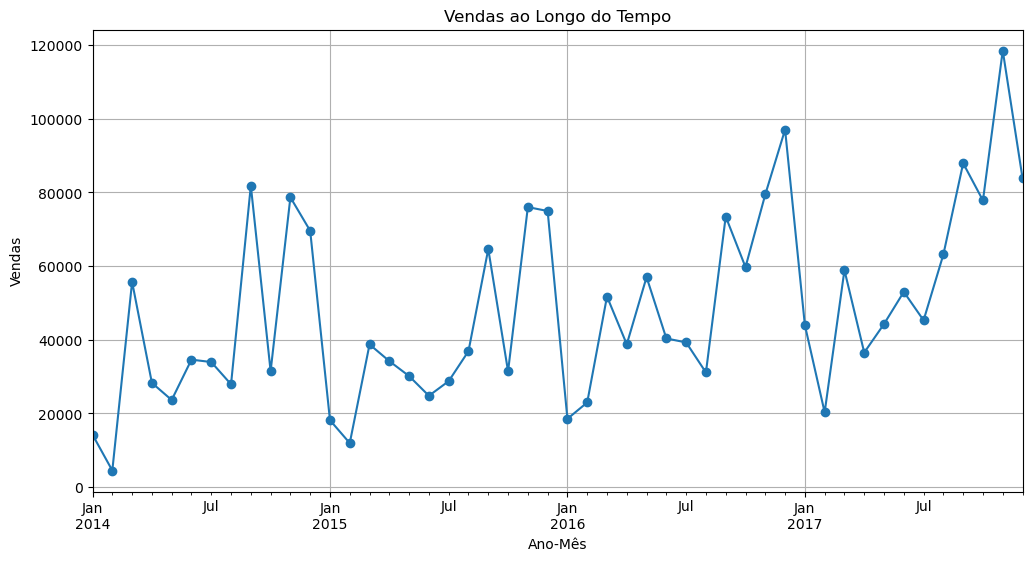

In [15]:
df['Year-Month'] = df['Order Date'].dt.to_period('M')

vendas_por_mes = df.groupby('Year-Month')['Sales'].sum()

plt.figure(figsize=(12, 6))
vendas_por_mes.plot(marker='o')
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

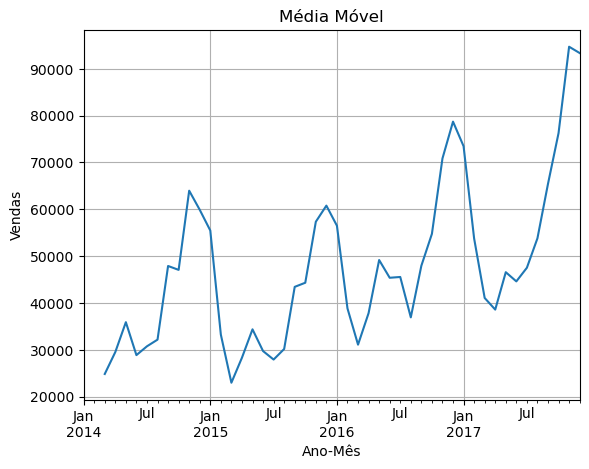

In [16]:
media_movel = vendas_por_mes.rolling(window=3).mean()

media_movel.plot()
plt.title('Média Móvel')
plt.xlabel('Ano-Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

### Estudo dos Segmentos de Clientes


- Quais categorias de produtos são mais populares entre os segmentos de clientes?

In [17]:
vendas_por_categoria_segmento = df.groupby(['Sub-Category', 'Segment'])['Quantity'].sum().unstack()

# Exibindo as vendas por categoria de produto e segmento de cliente
print("Vendas por Categoria de Produto e Cliente:")
print(vendas_por_categoria_segmento)

Vendas por Categoria de Produto e Cliente:
Segment       Consumer  Corporate  Home Office
Sub-Category                                  
Accessories       1578        881          517
Appliances         908        569          252
Art               1625        850          525
Binders           3015       1848         1111
Bookcases          496        271          101
Chairs            1234        719          403
Copiers            117         70           47
Envelopes          442        323          141
Fasteners          473        273          168
Furnishings       1834       1086          643
Labels             715        398          287
Machines           217        141           82
Paper             2602       1555         1021
Phones            1685       1003          601
Storage           1619       1000          539
Supplies           359        202           86
Tables             602        419          220


- Qual o lucro por cada segmento de cliente?

In [18]:
lucro_por_segmento = df.groupby(['Segment'])['Profit'].sum()

# Exibindo as vendas por categoria de produto e segmento de cliente
print("Lucro por segmento de cliente:")
print(lucro_por_segmento)

Lucro por segmento de cliente:
Segment
Consumer       134119.2092
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64


### Análise de Produtos:
- Quais são os produtos mais vendidos em termos de quantidade e receita?

In [19]:
produtos_mais_vendidos_quantidade = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Produtos Mais Vendidos em Termos de Quantidade:")
print(produtos_mais_vendidos_quantidade)

Produtos Mais Vendidos em Termos de Quantidade:
Product Name
Staples                                                       215
Staple envelope                                               170
Easy-staple paper                                             150
Staples in misc. colors                                        86
KI Adjustable-Height Table                                     74
Avery Non-Stick Binders                                        71
Storex Dura Pro Binders                                        71
GBC Premium Transparent Covers with Diagonal Lined Pattern     67
Situations Contoured Folding Chairs, 4/Set                     64
Staple-based wall hangings                                     62
Name: Quantity, dtype: int64


In [20]:
produtos_mais_vendidos_receita = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nProdutos Mais Vendidos em Termos de Receita:")
print(produtos_mais_vendidos_receita)


Produtos Mais Vendidos em Termos de Receita:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


- Existem produtos com margens de lucro negativas?

In [21]:
df['profit_is_neg'] = df.Profit<0

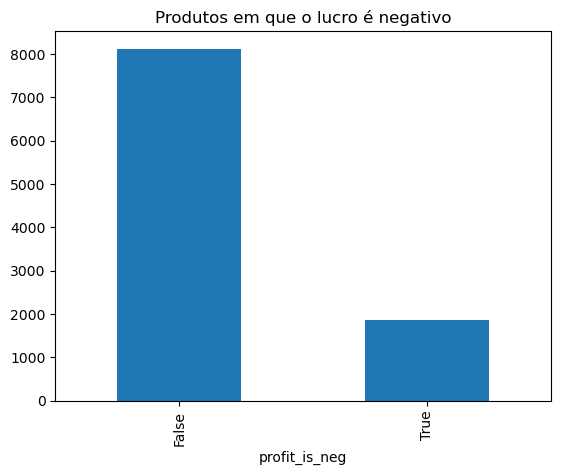

In [22]:
df.groupby('profit_is_neg')['Product Name'].count().plot.bar(title = "Produtos em que o lucro é negativo");

Agrupando os dados por níveis de desconto e calculando a média de lucro


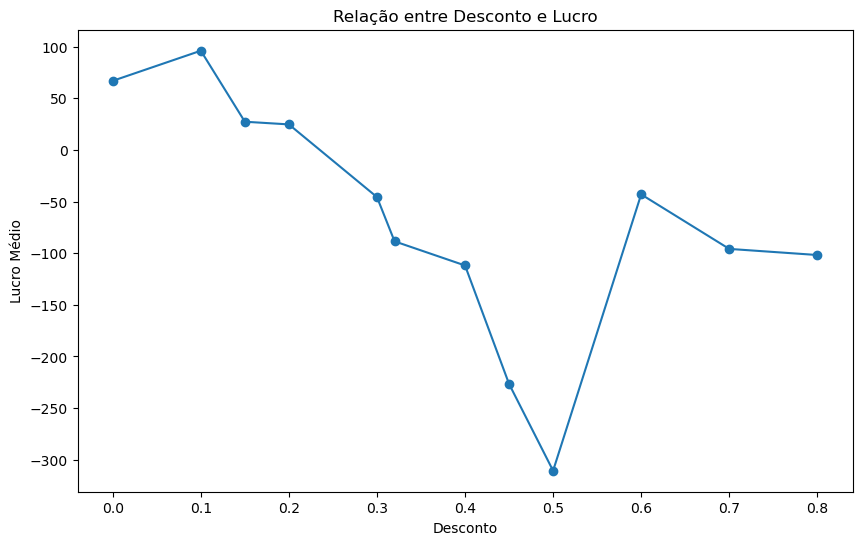

In [23]:
media_lucro_por_desconto = df.groupby('Discount')['Profit'].mean()

# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(media_lucro_por_desconto.index, media_lucro_por_desconto.values, marker='o')
plt.title('Relação entre Desconto e Lucro')
plt.xlabel('Desconto')
plt.ylabel('Lucro Médio')
plt.show()

O gráfico mostra que lucros negativos podem indicar descontos excessivos que podem estar prejudicando a rentabilidade.

In [24]:
df[['Discount', 'Profit']].corr()

,Discount,Profit
Discount,1.000000,-0.219487
Profit,-0.219487,1.000000


Há uma correlação moderada entre desconto e lucro.

### Geografia:
- Como as vendas variam entre diferentes regiões, cidades e estados?
- Existem diferenças significativas nas preferências de produtos entre diferentes regiões?

In [25]:
vendas_por_regiao = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

# Análise das Vendas por Estado
vendas_por_estado = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Análise das Preferências de Produtos por Região
preferencias_por_regiao = df.groupby(['Region', 'Category'])['Sales'].sum().unstack()


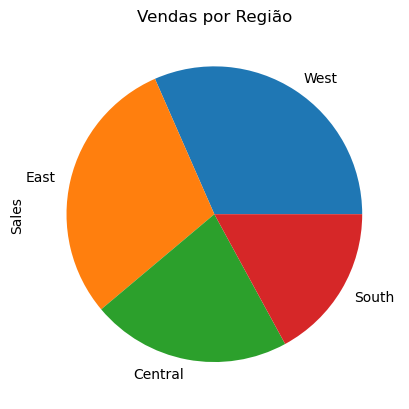

In [26]:
vendas_por_regiao.plot.pie(title = 'Vendas por Região');

In [27]:
print("\nPreferências de Produtos por Região:")
print(preferencias_por_regiao)


Preferências de Produtos por Região:
Category    Furniture  Office Supplies  Technology
Region                                            
Central   163797.1638       167026.415  170416.312
East      208291.2040       205516.055  264973.981
South     117298.6840       125651.313  148771.908
West      252612.7435       220853.249  251991.832


In [28]:
vendas_por_estado = pd.DataFrame(vendas_por_estado).reset_index()
vendas_por_estado['Abreviacao'] = vendas_por_estado['State'].map(utils.mapeamento_estados)

fig = px.choropleth(locations=vendas_por_estado['Abreviacao'], 
                    locationmode='USA-states', 
                    scope="usa",
                    color=vendas_por_estado['Sales'],
                    hover_name=vendas_por_estado['State'],
                    color_continuous_scale='Blues',
                    labels={'color': 'Sales', 'locations': 'State'},
                    title='Vendas por Estado (EUA)')

# Exibindo o mapa cloroplético
fig.show()


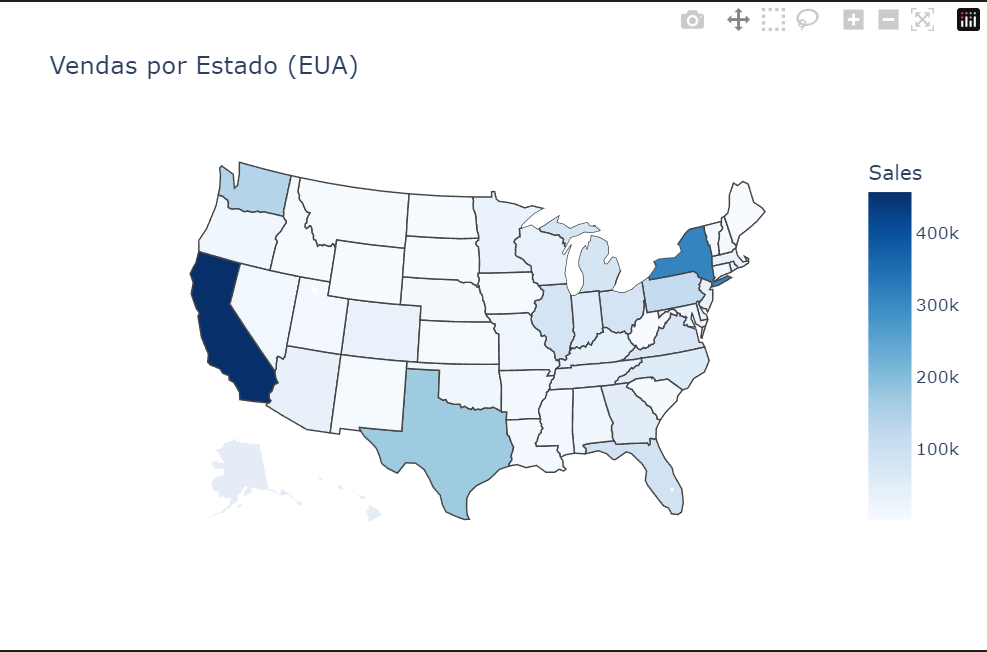

### Devoluções

Anna Andreadi possui uma média de devolução muito maior que as outras pessoas.

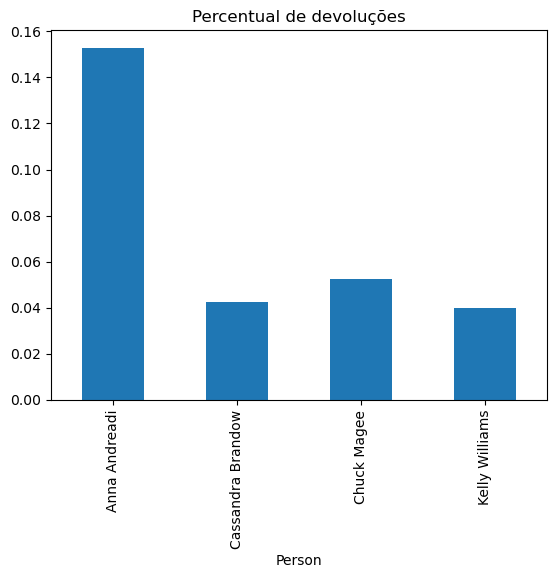

In [29]:
devolucoes_por_pessoa = df.groupby("Person")["Returned"].apply(lambda x: (x == "Yes").mean())
devolucoes_por_pessoa.plot.bar(x="Pessoa", title="Percentual de devoluções");

In [30]:
df['Sales_per_quantity'] = df['Sales']/df['Quantity']

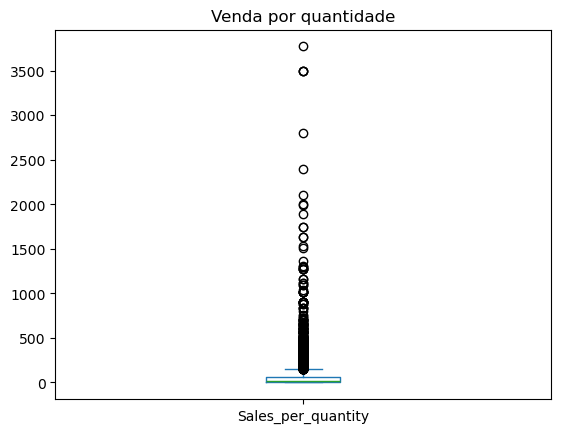

In [31]:
df.Sales_per_quantity.plot.box(title = 'Venda por quantidade');

### Métricas

Extraimos alguns insights interessantes da base de dados. É claro que é necessário um tempo e maior entendimento do négocio para uma avaliação mais precisa de anomalias, mas vamos verificar o que encontramos:

- Aletar sobre Tempos de entregas fora do previsto dado o Ship Mode;
- Alertar sobre descontos excessivos que afetam o lucro da venda;
- Aletar sobre as devoluções para cada pessoa de venda (em especial Anna Andreadi, da região Oeste);
- Alertar sobre altos preços de venda por quantidade;

In [32]:
class SimpleTest:
    def __init__(self, sale):
        self.sale = sale
    
    def alerta_tempo_entrega(self):
        d = self.sale
        if d['Ship Mode']=='Same Day':
            return d['Delivery_time'] != 0
        if d['Ship Mode']=='Second Class':
            return d['Delivery_time'] > 5
        if d['Ship Mode']<='Standard Class':
            return d['Delivery_time'] > 7
    
    def alerta_descontos_excessivos(self, limit_discount = 0.3):
        d = self.sale
        return (d['Discount'] > limit_discount) & (d['Profit'] < 0)
    
    def alerta_devolucoes_por_vendedor(self, vendedor):
        d = self.sale
        return (d['Person'] == vendedor) & (d['Returned'] == 'Yes')

    
    def alerta_altos_precos_unitario(self, outlier_preco):
        d = self.sale
        return d['Sales']/d['Quantity'] > outlier_preco


Exemplo de uso:
- Supondo que 'sale' seja uma venda qualquer

In [33]:
sale = df.iloc[123]
test = SimpleTest(sale)

# Exemplo de alerta de tempo de entrega para o modo de envio 'Standard Class'
alerta_tempo_entrega = test.alerta_tempo_entrega()
print(f'Anomalia no tempo de entrega: {alerta_tempo_entrega}')

# Exemplo de alerta de descontos excessivos com limite acima de 0.2
alerta_descontos_excessivos = test.alerta_descontos_excessivos(0.2)
print(f'Anomalia em descontos: {alerta_descontos_excessivos}')

# Exemplo de alerta de devoluções para o vendedor 'Anna Andreadi'
alerta_devolucoes_por_vendedor = test.alerta_devolucoes_por_vendedor('Anna Andreadi')
print(f'Houve devolução? : {alerta_devolucoes_por_vendedor}')

# Exemplo de alerta de altos preços de venda por quantidade com limite de preço de 200
alerta_altos_precos_unitarios = test.alerta_altos_precos_unitario(300)
print(f'Alerta de alto preço unitário : {alerta_altos_precos_unitarios}')


Anomalia no tempo de entrega: False
Anomalia em descontos: False
Houve devolução? : False
Alerta de alto preço unitário : False


### Melhorias

Certamente é necessário mais tempo e entendimento das particularidades do negócio para criar e avaliar tais métricas. O que fiz aqui foi explorar o dataset de vendas, expor alguns ideis de hipóteses a serem investigadas e possíveis anomalias que podem ser detectadas. Com mais tempo, o que faria é o seguinte:

- Entender quais variáveis afetam na devolução de um produto. Criar um modelo de machine learning para estimar a probabilidade de devolução;
- Fazer o forecasting de vendas e detectar anomalis em vendas caso o valor real tenha sido muito diferente do previsto;
- Entender melhor cada categoria de produto, comportomanto de vendas por região, taxa de devolução, lucro médio;
- Fazer testes de hipóteses seguindo o rigor estatístico. Toda conclusão precisa ser estatisticamente significativa;
- Compreender varíaveis que afetam o lucro. A taxa de desconto pode reduzir o lucro, mais quais outros fatores além deste influenciam no lucro?

